In [ ]:
# Install on Google Colab server the ocean-data-parser package
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git

In [1]:
# Load packages
from ocean_data_parser.parsers.dfo.odf import bio_odf
import requests
import os
import matplotlib.pyplot as plt

# Download an ODF locally from GitHub


In [2]:
def download_file_from_github(raw_url):
    """Download a github raw file localy"""
    odf_file_path = os.path.basename(raw_url)
    response = requests.get(raw_url)
    with open(odf_file_path, "w") as f:
        f.write(response.text)
    return odf_file_path

In [1]:
# Download from the ocean-data-parser repository one BIO ODF test file for demonstration purposes
odf_file_path = download_file_from_github(
    "https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/development/tests/parsers_test_files/dfo/odf/bio/CTD/CTD_HUD2018030_017_01_UP.ODF"
)

NameError: name 'download_file_from_github' is not defined

# Read the ODF file to xarray dataset


In [4]:
# Read demonstration file
ds = bio_odf(odf_file_path)
ds

/Users/jessybarrette/repo/ocean-data-parser-start/ocean_data_parser/parsers/dfo/odf_source/parser.py:253: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(
Unable to link multiple Fluorometer, Seapoint Ultraviolet instruments via sdn_parameter_urn attribute.
Unable to link multiple Fluorometer, Seapoint instruments via sdn_parameter_urn attribute.


<xarray.Dataset>
Dimensions:                 (depth: 101)
Coordinates:
    measurement_time        (depth) datetime64[ns] 2018-09-16T17:34:05 ... 20...
  * depth                   (depth) float64 100.2 99.18 98.19 ... 1.984 0.9921
    latitude                float64 42.76
    longitude               float64 -65.48
Data variables: (12/107)
    SYTM_01                 (depth) datetime64[ns] 2018-09-16T17:34:05 ... 20...
    CNTR_01                 (depth) float64 1.371e+04 1.374e+04 ... 3.641e+04
    ScanNumber              (depth) float64 1.371e+04 1.374e+04 ... 3.641e+04
    QCNTR_01                (depth) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES_01                 (depth) float64 101.0 100.0 99.0 ... 3.0 2.0 1.0
    PRESPR01                (depth) float64 101.0 100.0 99.0 ... 3.0 2.0 1.0
    ...                      ...
    OxygenSensor_2          <U554 '{"@SensorID": "38", "SerialNumber": "0042"...
    Fluorometer             <U113 '{"@SensorID": "69", "SerialNumber": "3668"...
    FluoroSeapointSensor    <U115 '{"@SensorID": "11", "SerialNumber": "6210"...
    pH_Sensor               <U116 '{"@SensorID": "43", "SerialNumber": "1129"...
    TurbidityMeter          <U134 '{"@SensorID": "70", "SerialNumber": "1490"...
    SPAR_Sensor             <U144 '{"@SensorID": "51", "SerialNumber": "1043"...
Attributes: (12/87)
    organization:                    Fisheries and Ocean Canada - Pêche et Oc...
    institution:                     DFO BIO
    country:                         Canada
    ioc_country_code:                18
    iso_3166_country_code:           CA
    ices_edmo_code:                  1811
    ...                              ...
    odf_data_type:                   CTD
    original_odf_header:             ODF_HEADER,\n  FILE_SPECIFICATION='CTD_H...
    original_odf_header_json:        {\n"ODF_HEADER": {\n"FILE_SPECIFICATION"...
    platform_id:                     18HU
    seabird_processing_modules:      # datcnv_date = Mar 28 2019 14:09:40, 7....
    source:                          CTD_HUD2018030_017_01_UP.ODF

## Plot Profile


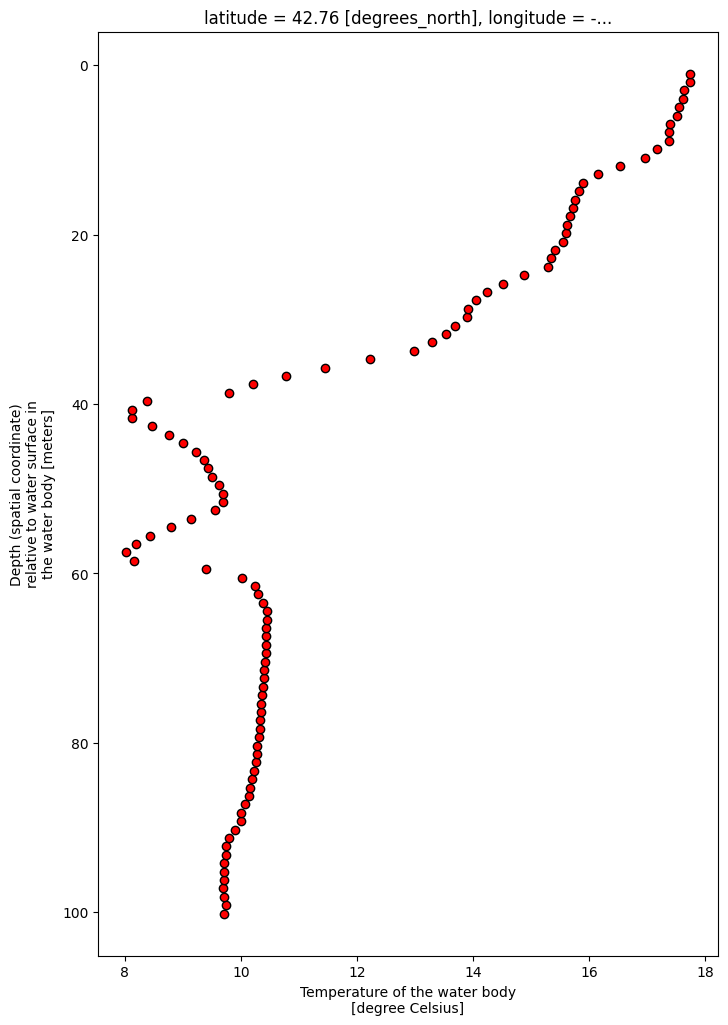

In [9]:
fig = plt.figure(figsize=(8, 12))
ds.plot.scatter(
    x="TEMPPR01", y="depth", facecolor="red", edgecolor="black", yincrease=False
)

## TS Diagram


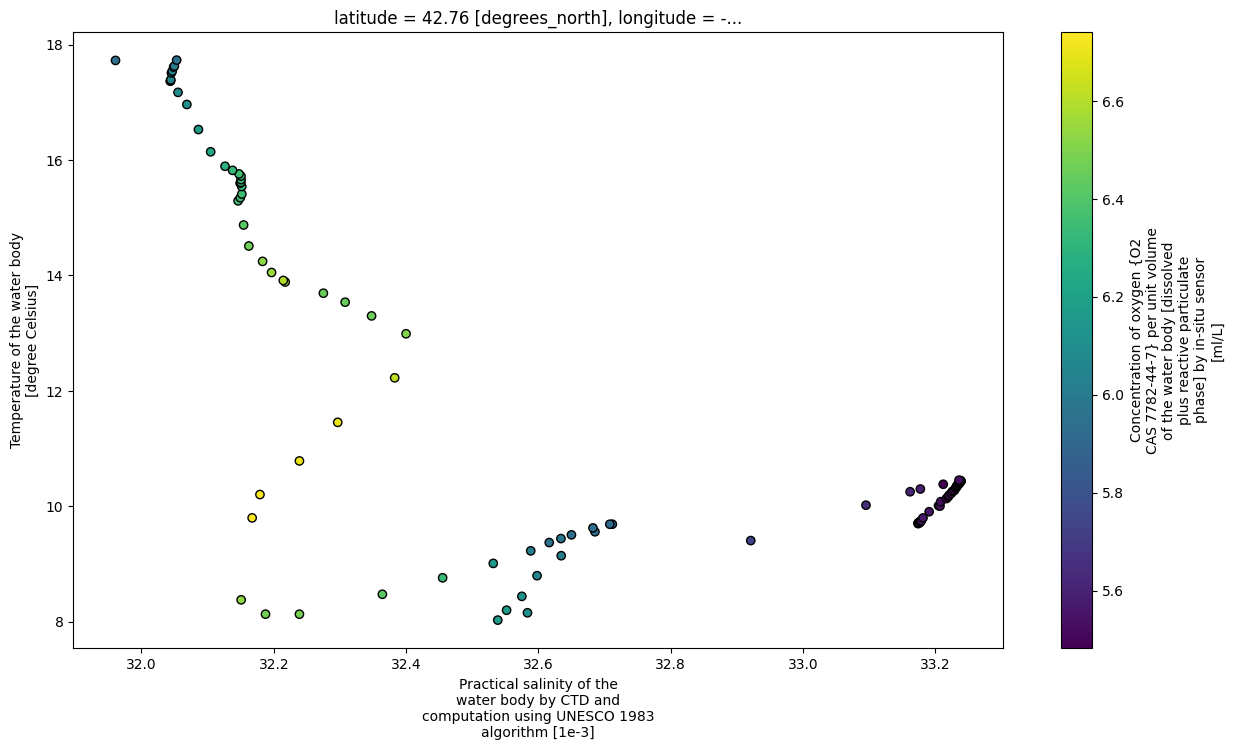

In [15]:
# fig,ax = plt.subplots(1,1,figsize=(16,10))
fig = plt.figure(figsize=(15, 8))
ds.plot.scatter(
    x="PSALST01", y="TEMPPR01", hue="DOXYZZ01", edgecolor="black", linewidth=0
)